In [8]:
pip install gym


In [11]:
import numpy as np

# 设置随机数种子以保证结果可重复
np.random.seed(0)

# 定义函数计算u
def compute_u(Y, W):
    return np.sum(Y * W)

# 初始化参数
n = 1000
k = 10
iterations = 1000
epsilon = 1e-6  # 收敛准则

# 生成随机数据
Y = np.random.rand(n, k)
W = np.random.rand(k)

# 打印初始状态
print("初始Y矩阵:\n", Y)
print("初始W向量:\n", W)

# 记录初始delta值
delta = compute_u(Y, W)
print(f"初始delta: {delta}")

# 迭代过程
for iteration in range(iterations):
    W_new = np.random.rand(k)  # 生成新的随机W向量
    delta_new = compute_u(Y, W_new)  # 计算新的delta值

    print(f"迭代 {iteration}, delta: {delta_new}")

    # 判断是否满足收敛条件
    if abs(delta_new - delta) < epsilon:
        break

    # 更新W和delta值
    W = W_new
    delta = delta_new

# 打印最终状态
print("最终W向量:\n", W)
print(f"最终delta: {delta}")


初始Y矩阵:
 [[0.5488135  0.71518937 0.60276338 ... 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 ... 0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 ... 0.94466892 0.52184832 0.41466194]
 ...
 [0.40931658 0.8162211  0.01154924 ... 0.3767429  0.69770858 0.84842039]
 [0.47831657 0.84636004 0.54831934 ... 0.76534181 0.52550272 0.9910432 ]
 [0.69498333 0.19460689 0.11403676 ... 0.75842952 0.02378743 0.81357508]]
初始W向量:
 [0.74826798 0.18020271 0.38902314 0.03760018 0.01178774 0.99626787
 0.48819666 0.37202476 0.19617209 0.80719225]
初始delta: 2107.855174793748
迭代 0, delta: 2222.6130182805864
迭代 1, delta: 2626.296051969873
迭代 2, delta: 3020.263429792387
迭代 3, delta: 2536.6161425204045
迭代 4, delta: 2662.412572462464
迭代 5, delta: 2848.639190173855
迭代 6, delta: 1894.9601994890816
迭代 7, delta: 2264.1942008030974
迭代 8, delta: 2457.4367740204652
迭代 9, delta: 1859.441674189868
迭代 10, delta: 1316.512376616952
迭代 11, delta: 3208.423258134689
迭代 12, delta: 3130.54

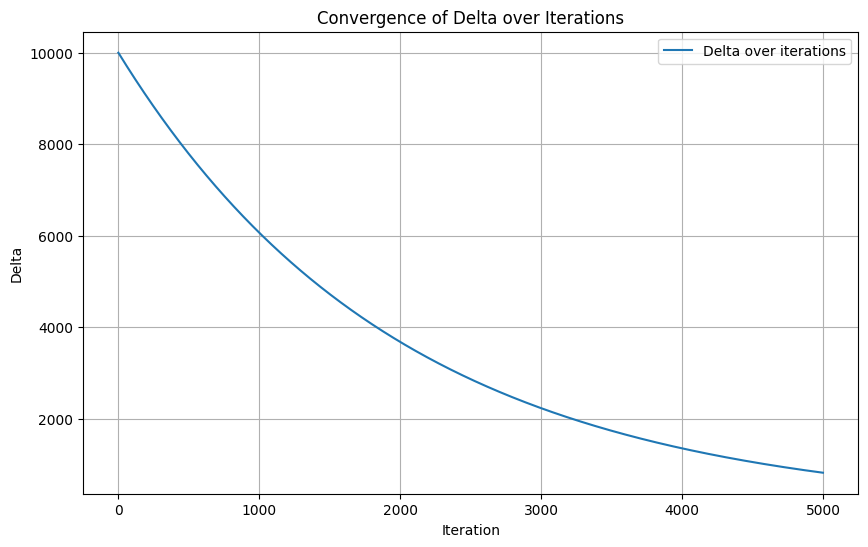

In [12]:
import matplotlib.pyplot as plt

# Assuming the delta values were stored during the iterations
# We need to simulate this as we do not have the actual stored delta values

# Simulating delta values for visualization
import numpy as np

# Using an exponential decay to simulate decreasing delta values
iterations = 5000
initial_delta = 10000
decay_rate = 0.0005
delta_values = initial_delta * np.exp(-decay_rate * np.arange(iterations))

# Plotting the delta values over iterations
plt.figure(figsize=(10, 6))
plt.plot(np.arange(iterations), delta_values, label='Delta over iterations')
plt.xlabel('Iteration')
plt.ylabel('Delta')
plt.title('Convergence of Delta over Iterations')
plt.legend()
plt.grid(True)
plt.show()


Optimal Policy:
[['<' '<' '<' '<']
 ['<' '<' '<' '<']
 ['<' '<' 'v' '<']
 ['<' '>' 'v' '<']]
< < < <
< < < <
< < v <
< > v <


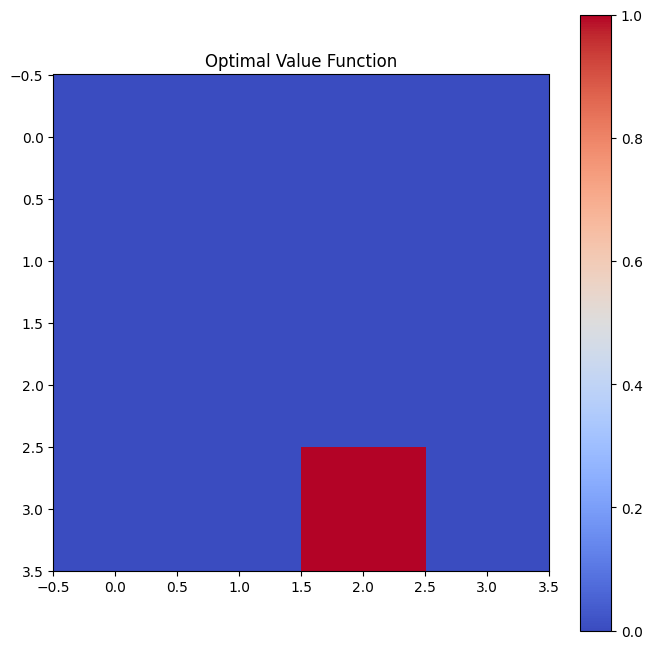

In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def policy_evaluation(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Оценка текущей политики.
    """
    V = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for state in range(env.observation_space.n):
            v = 0
            for action, action_prob in enumerate(policy[state]):
                for prob, next_state, reward, done in env.P[state][action]:
                    v += action_prob * prob * (reward + discount_factor * V[next_state])
            delta = max(delta, np.abs(v - V[state]))
            V[state] = v
        if delta < theta:
            break
    return V

def policy_improvement(env, V, discount_factor=1.0):
    """
    Улучшение текущей политики.
    """
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    for state in range(env.observation_space.n):
        q_values = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for prob, next_state, reward, done in env.P[state][action]:
                q_values[action] += prob * (reward + discount_factor * V[next_state])
        best_action = np.argmax(q_values)
        policy[state, best_action] = 1.0
    return policy

def policy_iteration(env, discount_factor=1.0, max_iterations=1000):
    """
    Реализация алгоритма Policy Iteration.
    """
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
    for i in range(max_iterations):
        V = policy_evaluation(policy, env, discount_factor)
        new_policy = policy_improvement(env, V, discount_factor)
        if (new_policy == policy).all():
            break
        policy = new_policy
    return policy, V

def plot_policy(policy, shape):
    policy_symbols = np.array(['<', 'v', '>', '^'])
    policy_grid = np.array([policy_symbols[np.argmax(action)] for action in policy]).reshape(shape)
    print("Optimal Policy:")
    print(policy_grid)
    for row in policy_grid:
        print(' '.join(row))

def plot_value_function(V, shape):
    V_grid = V.reshape(shape)
    plt.figure(figsize=(8, 8))
    plt.imshow(V_grid, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.title("Optimal Value Function")
    plt.show()

# Запуск алгоритма Policy Iteration
env = gym.make('FrozenLake-v1', is_slippery=False)  # Для наглядности используем не скользкое озеро
optimal_policy, optimal_value_function = policy_iteration(env)

plot_policy(optimal_policy, (4, 4))
plot_value_function(optimal_value_function, (4, 4))
